# **Exploração e análise de dados de crédito com SQL**

*Esse notebook faz parte do curso de Analista de dados da EBAC*

# *Os dados:*

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = Idade do cliente;
* sexo = Se o cliente é masculino(M) ou feminino(F);
* dependentes = Número de dependentes do cliente;
* escolaridade = Nível de escolaridade dos clientes;
* salario_anual = Faixa salarial dos clientes;
* tipo_cartão = Tipo de cartão do cliente;
* qtd_produtos = Quantidade de produtos comprados;
* iteracoes_12m = Quantidade de transações nos últimos 12 meses;
* meses_inativos_12m = Quantidade de meses que o cliente ficou inativo;
* limite_credito = Limite de crédito do cliente;
* valor_transacoes_12m = Valor das transações nos últimos 12 meses;
* qtd_transacoes_12m = Quantidade de transações nos últimos 12 meses.

**Criando a tabela no athena:**

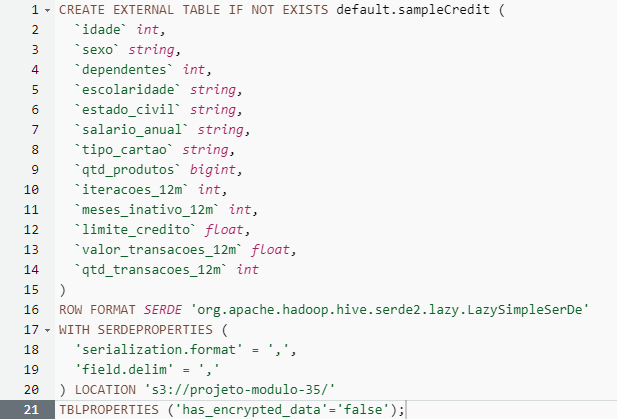

A primeira etapa é buscar enteder o tamanho da nossa base de dados.

**Query:** SELECT count(*) FROM samplecredit;

***Resposta:*** 2564 linhas

**PS.:** A base de dados acima contém mais linhas que a seleção utilizada, podemos utilizar todas as linhas ou apenas uma fração dos dados. Quanto maior a quantidade de dados, mais confiável a análise, porém existem limites computacionais e financeiros na qual a redução para a análise de dados para fins de estudo se torna interessante.

**Vejamos agora os dados:**

**Query2:** select * from samplecredit limit 10;

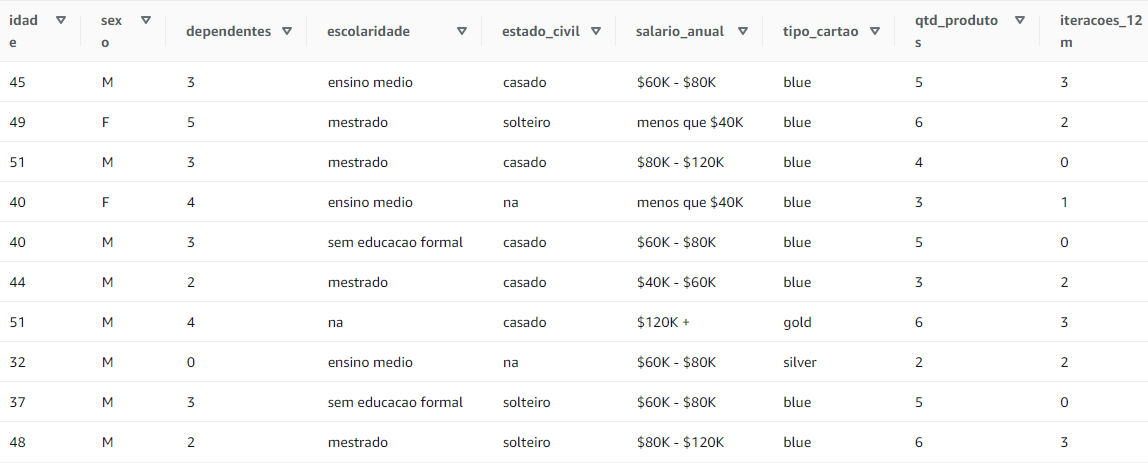

Podemos notar que existem alguns valores nulos na tabela.

**Query 3:** DESCRIBE samplecredit;

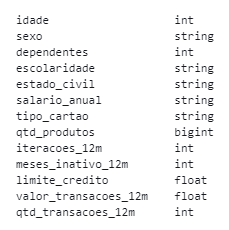

Verificamos os tipos de dados e percebemos que existem variáveis numéricas e não numéricas. 

**Query 4:** SELECT DISTINCT escolaridade FROM samplecredit;

Verificamos nessa query o tipo de escolaridade disponível na nossa base de dados.

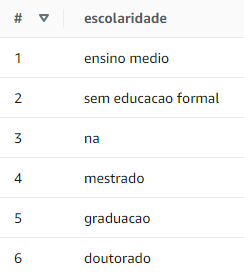

A query nos traz valores nulos na nossa base, para não haver erros na nossa consulta é importa tratar os valores.

**Query 5:** SELECT DISTINCT estado_civil FROM samplecredit;

Aqui fizemos uma consulta sobre o estado civil disponível no nosso banco de dados.

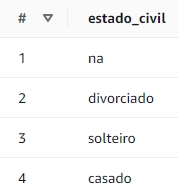

Novamente encontramos valores nulos na tabela.

**Query 6:** SELECT DISTINCT salario_anual FROM samplecredit;

A consulta executada nessa query é a faixa salarial dos clientes disponível em nosso banco de dados.

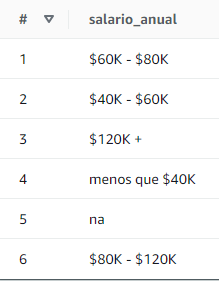

Novamente encontramos valores nulos em nossa consulta.

**Query 7:** SELECT DISTINCT tipo_cartao FROM samplecredit;

A consulta é sobre o tipo de cartão dos clientes disponível em nosso banco de dados.

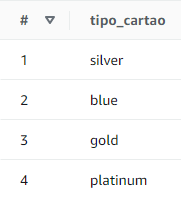

Vemos que não há necessidade de tratamento, pois não temos valores nulos.

# **Analisando os dados**

Após a exploração dos dados buscamos entender as informações disponíveis em nosso banco de dados, podemos analisar as informações e entender o que está acontecendo.

**Query 8:** select count(*), salario_anual from samplecredit group by salario_anual;

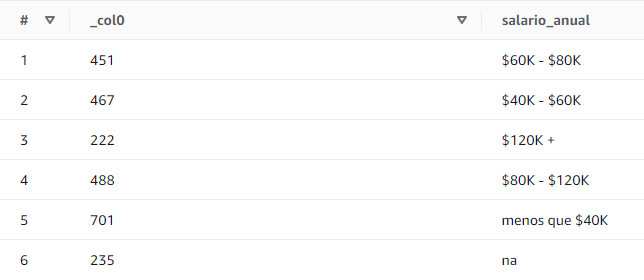


Percebemos que em nossa base de dados a grande maioria de nossos clientes possui renda menor que 40k, sendo que existem 235 clientes que não informaram a faixa salarial.

**Query 9:** select count(*), sexo from credito group by sexo;

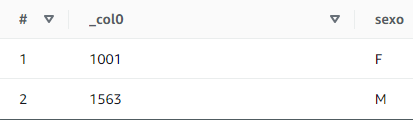

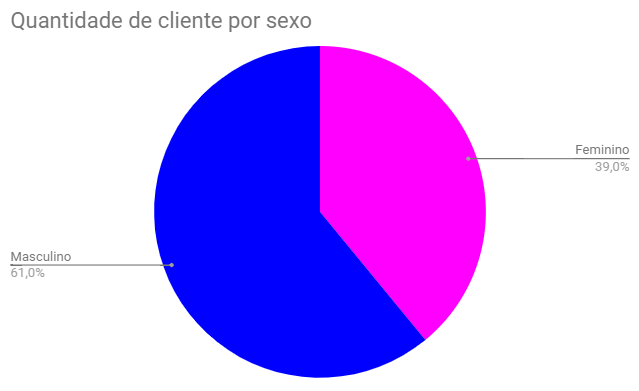

Percebemos que a maioria dos nossos clientes é do sexo masculino.

**Query 10:** select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from samplecredit group by sexo

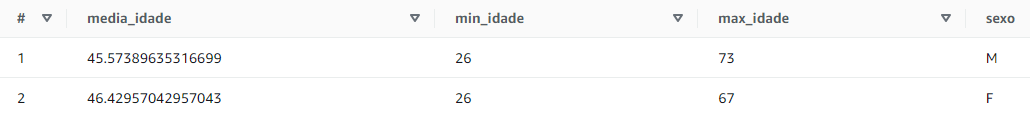

A partir dessa análise obtemos poucas informações, mas observamos que a maior idade está entre as pessoas de sexo masculino.

**Query 11:** select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from samplecredit

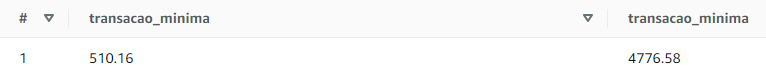

Nessa análise percebemos que nos últimos 12 meses obtemos um valor de transação que varia entre 510.16 e 4776.58.

**Query 12:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from samplecredit where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

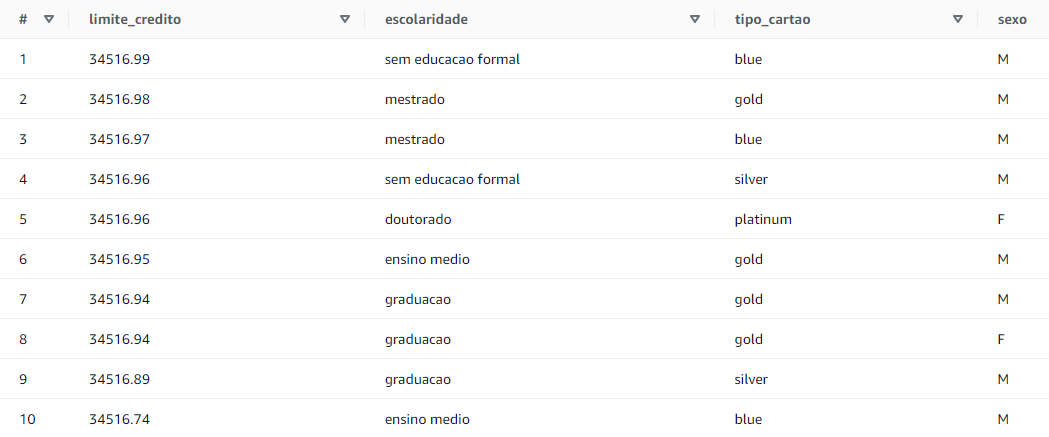

Não há relação entre a escolaridade e o limite de crédito. Também não há relação entre o tipo do cartão, escolaridade e limite.

**Query 13:** select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from samplecredit group by sexo

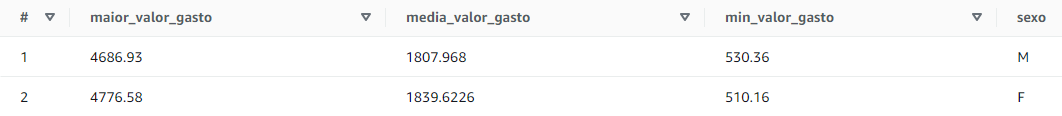

Não há relação entre os gastos de homens e mulheres, pois ambos os gastos são parecidos.

**Query 14:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from samplecredit where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) 

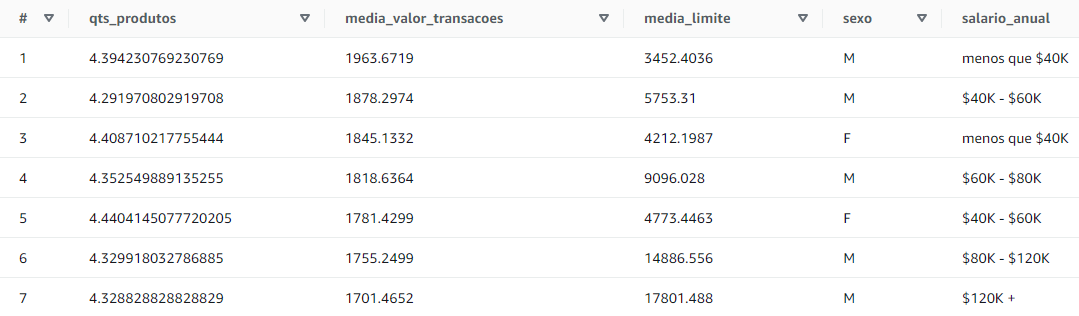

Há relação entre faixa salarial e limite de crédito, pessoas com maior faixa salarial possuem um maior limite de crédito.

# **Conclusão**

Análises extraídas do banco de dados de crédito:

* A maioria dos clientes possui renda de até 40K;
* A maioria dos clientes é do sexo masculino;
* A escolaridade não influencia no limite de crédito;
* Os clientes com maiores limites são em sua maioria homens;
* A faixa salarial impacta diretamente no limite de crédito;
* Não existem clientes com salário anual acima de 60K do sexo feminino.

